# Generate Images and Video

In [6]:
%reload_ext autoreload
%autoreload 2

import dotenv
import os
import sys

print(f'Python {sys.version} from path {sys.executable}')

Python 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:08:06) [GCC 11.3.0] from path /opt/py/bin/python


In [7]:
import diffusers
print(f'diffusers {diffusers.__version__}')
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'torch {torch.__version__} on {device}')

diffusers 0.16.1
torch 2.0.1 on cuda:0


In [17]:
prompt = "British army dancing"

## Generate Image

  0%|          | 0/50 [00:00<?, ?it/s]

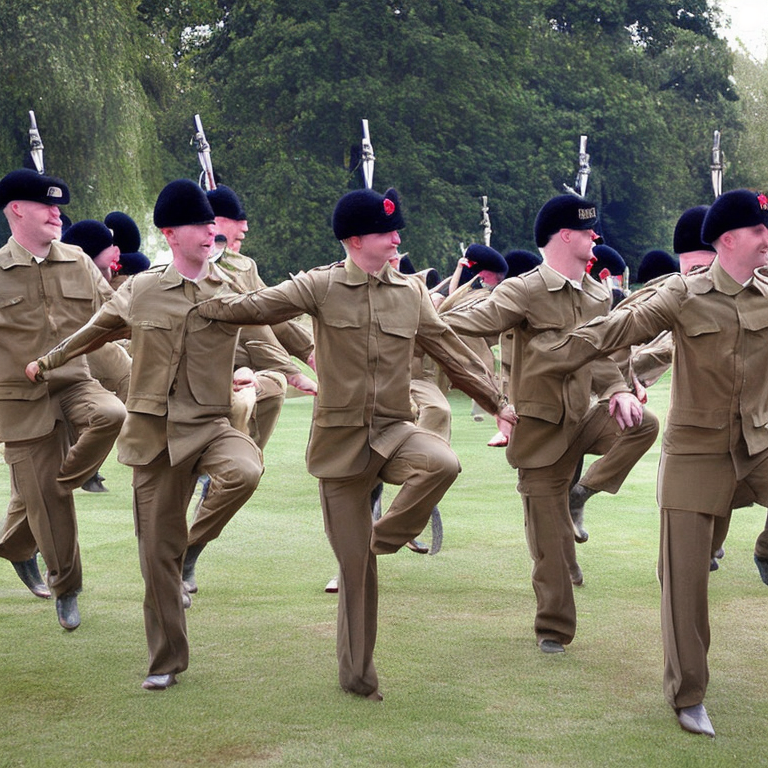

In [18]:
model = "stabilityai/stable-diffusion-2-1"
pipe = diffusers.StableDiffusionPipeline.from_pretrained(model, torch_dtype=torch.float16).to('cuda')
image = pipe(prompt).images[0]
image

## Generate Video

In [19]:
model = "damo-vilab/text-to-video-ms-1.7b"
pipe = diffusers.DiffusionPipeline.from_pretrained(model, torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = diffusers.DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

video_frames = pipe(prompt, num_inference_steps=25).frames
video_path = diffusers.utils.export_to_video(video_frames,'video.mp4')

  0%|          | 0/25 [00:00<?, ?it/s]

In [20]:
print(video_path)

video.mp4


## cleanup notebook resources